# Identify Characteristic Values for the Spring Mass System - Best Guess

To determine the optimum system parameters, the effects of the parameters on the result must be studied. A simple method to determine good parameters is trial and error. Manually changing the signal parameters is a good start, as the interaction of parameters and effect quickly becomes clear. 

In this experimet, the measured data as plotted first.

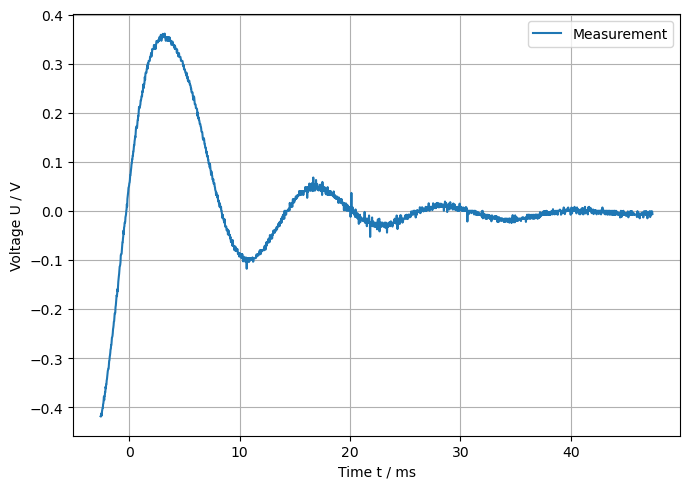

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read and format data
signal = pd.read_csv('scope_1.csv', header=1)
signal['time'] = signal['second']*1000
signal = signal.drop(['second'], axis=1)
signal = signal.rename(columns={'Volt': 'measurement'})

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time'], signal['measurement'], label='Measurement')
ax1.set_xlabel(r'Time t / ms')
ax1.set_ylabel(r'Voltage U / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

The measured signal is compared with a simulated signal based on mathematical description

$x\left( t \right) = A_0 \cdot {e^{{\delta _0} \cdot \left( {t - {t_0}} \right)}} \cdot \cos \left( {\frac{{2 \cdot \pi }}{{{T_0}}} \cdot \left( {t - {t_0}} \right)} \right) \cdot \sigma \left( {t - {t_0}} \right)$

The parameters are modified based upon your individual ideas. The RMS score is used to find the best parameter combination.

RMS score: 0.0333


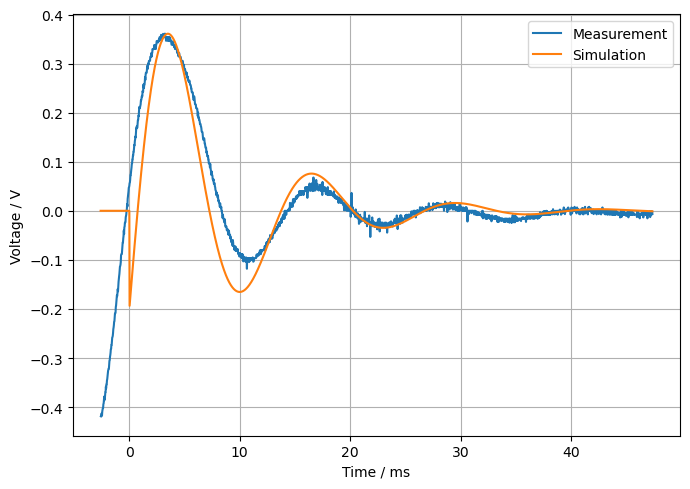

In [2]:
# Define parameters for simulation
A_0 = 0.35
T_0 = 13
t_0 = 4
d_0 = -0.12

# Generate Signal
signal['simulation'] = A_0 * (np.exp(d_0*(signal['time'] - t_0)) * np.cos(2*np.pi/T_0*(signal['time']-t_0))) * (signal['time'] > 0)

# Plot signals
ax1 = plt.figure(1, figsize=(7, 5)).subplots(1, 1)
ax1.plot(signal['time'], signal['measurement'], label='Measurement')
ax1.plot(signal['time'], signal['simulation'], label='Simulation')
ax1.set_xlabel(r'Time / ms')
ax1.set_ylabel(r'Voltage / V')
ax1.legend()
ax1.grid()
plt.tight_layout()

# RMS score for comparison
measurement = signal.loc[signal.time > 5, 'measurement']
simulation = signal.loc[signal.time > 5, 'simulation']
N = measurement.shape
rms = np.sqrt(((simulation - measurement)**2).sum() / N).round(4)
print(f'RMS score: {rms[0]}')